# Business Understanding

Produk yang akan saya bahas yaitu Uniqlo. Saya memilih produk tersebut dikarenakan saya ingin menganalisis produk ini apakah dibicarakan secara positif atau negatif di hal layak umum.

selanjutnya yaitu kita melakukan data collection yaitu dengan mengimport atau memasukkan data ke dalam python menggunakan pandas. data yang kita gunakan merupakan hasil scraping dari twitter.

# Data Collection

In [1]:
import pandas as pd

df = pd.read_csv('tweets.csv')

Lalu selanjutkan kita masuk ke proses Pre-processing yang dimana pertama kita akan melakukan case folding atau mengubah semua huruf menjadi huruf kecil agar mempermudah kita nantinya untuk mencocokkan kata. proses ini menggunakan modul string.

# Pre-processing

## Case Folding 

In [2]:
import string

# kita buat kolom baru untuk hasil case folding ini, 
# karna jika terjadi kesalahan dalam memproses data, 
# akan memudahkan kita dalam melakukan pemrosesan data ulang karna tweet yang asli tidak terjadi perubahan
df['clean_tweet'] = df['tweet'].str.lower()

lalu selanjutnya kita akan menghapus karakter spesial seperti '”!@#$%^&*() dan juga akan menghapus angka yang menempel disebuah kata menggunakan modul regex

In [3]:
import re

# untuk Menghapus angka yang melekat pada sebuah kata di dalam kolom 'clean_tweet' pada DataFrame df.
df['clean_tweet'] = df['clean_tweet'].str.replace(r'\d+', '', regex=True) 

# untuk menghapus spesial karakter selain huruf, angka, dan spasi di dalam kolom 'clean_tweet' pada DataFrame df.
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) 

# untuk Menghapus tanda baca (punctuation) di dalam kolom 'clean_tweet' pada DataFrame df.
df['clean_tweet'] = df['clean_tweet'].str.translate(str.maketrans("","",string.punctuation))

df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,ga tumbler kece by uniqlo new untuk orang si...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep ga sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada ga klu ada besok gw samperin uniqlo ...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


selanjutnya karna data tweet ini didapatkan dari twitter langsung, biasanya orang orang menggunakan emoji pada tweetnya, jadi kita akan hapus emoji tersebut.

### Clear Emoji

In [4]:
# sebelum kita membuat function untuk menghapus emoji, 
# kita akan menghapus spasi yang ada diawal dan akhir teks dan juga 
# memisahkan etiap kata dalam teks menjadi elemen-elemen terpisah dalam sebuah list

# untuk menghapus spasi yang ada diawal dan akhir teks, kita menggunakan .strip yang ada di method string
df['clean_tweet'] = df['clean_tweet'].str.strip()

# untuk memisahkan etiap kata dalam teks menjadi elemen-elemen terpisah dalam sebuah list, 
# kita menggunakan .split yang ada di method string
df['clean_tweet'] = df['clean_tweet'].str.split()

def emoji_cleaner(data):
    word_emoji = data
    # kita buat variabel dengan isi list untuk menyimpan teks awal dan list kosong yang akan berisi kata-kata 
    # setelah emoji dihapus.
    word_list = []
    
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    "]+", flags=re.UNICODE)
    '''emoji_pattern = re.compile("[..." "]+", flags=re.UNICODE): 
    Pada baris ini, sebuah pola regular expression dibuat menggunakan re.compile untuk mencocokkan emoji. 
    Pola ini mencakup rentang karakter Unicode yang umumnya digunakan untuk mengkodekan emoji.'''
    
    '''
    kita akan membuat for loop, setiap kata dalam teks awal (word_emoji) diperiksa. 
    Jika kata tersebut mengandung emoji, emoji tersebut dihapus menggunakan emoji_pattern.sub(r'', word), 
    tetapi perubahan tersebut tidak disimpan. Kemudian, kata tersebut ditambahkan ke dalam word_list.
    '''
    for word in word_emoji:
        emoji_pattern.sub(r'', word) 
        word_list.append(word)
        
    '''
    Setelah semua kata dibersihkan dari emoji dan ditambahkan ke dalam word_list, 
    kita menggabungkan semua kata dalam word_list menjadi satu teks dengan spasi sebagai pemisah, 
    dan hasilnya disimpan kembali ke dalam variabel data.
    '''
    data = ' '.join(word_list)
    return data

# untuk menerapkan fungsi tersebut, kita dapat menggunakan method .apply
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: emoji_cleaner(x))
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,ga tumbler kece by uniqlo new untuk orang sila...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep ga sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada ga klu ada besok gw samperin uniqlo ...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


setelah melakukan case folding, kita akan masuk ke proses selanjutnya dalam proses pre-processing yaitu tokenizing. proses tokenizing ini menggunakan modul nltk dan fungsi word_tokenize. Fungsi ini digunakan untuk membagi teks menjadi token, yaitu kata-kata atau unit-unit lain yang berarti dalam konteks teks.

## Tokenizing

In [5]:
import nltk
from nltk.tokenize import word_tokenize

def tokenizing(data):
    data = word_tokenize(data)
    return data

selanjutnya kita akan memodifikasi sedikit untuk merubah ke kata baku dan atau menghapus kata slang yang ada dalam tweet.

### Merubah kata slang jadi kata baku

In [6]:
# pertama kita buat list untuk nantinya diisikan kata2 slang beserta penggantinya. 
# list kata slang ini itu bersifat opsional boleh ditambahin atau dikurangin.
slang_list = [('yg','yang'),
              ('ga','tidak'),
              ('gak','tidak'),
              ('ya','iya'),
              ('aja','saja'),
              ('kalo','kalau'),
              ('gue','saya'),
              ('aku','saya'),
              ('bgt','banget')
             ]

# bikin function, dengan parameter data dan slang_list
def slang_cleaner(data, slang_list:list=[]):
    # panggil function tokenizing untuk mengubah teks menjadi token-token kata.
    word_token = tokenizing(data)
    
    # buat variable untuk menampung kata-kata
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
        
    data = ' '.join(word_list)
    return data

# untuk menerapkan fungsi tersebut, kita dapat menggunakan method .apply
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: slang_cleaner(x, slang_list))
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tidak tumbler kece by uniqlo new untuk orang s...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep tidak sanggup belanja di uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,sering padahal begini uniqlo pernah dapet ut g...
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,masih ada tidak klu ada besok gw samperin uniq...
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo lagi diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen ke mall kuningan apa tu jauh ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,saya sih pengguna uniqlo h amp m dan levi s se...
1664,1664,Uniqlo kapan diskon lg si,uniqlo kapan diskon lg si
1665,1665,Uniqlo,uniqlo


masih dalam rangkaian proses pre-processing, selanjutnya kita masuk ke filtering yaitu didalamnya ada stopwords dan lemmatization. disini kita masih menggunakan modul nltk, bedanya hanya function yang dipanggil sekarang itu ada stopwords dan word net lemmatizer

## Filtering

In [7]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# pertama kita menggunakan .strip untuk Menghapus spasi yang berada di awal dan akhir teks
df['clean_tweet'] = df['clean_tweet'].str.strip()

# lalu kita menggunakan .split untuk Memisahkan setiap kata dalam teks menjadi elemen-elemen terpisah dalam sebuah list
df['clean_tweet'] = df['clean_tweet'].str.split()

# buat fungsi yang mempunyai parameter word_list
def clean_stopwords(word_list):
    
    # Membuat list kosong processed_word_list yang akan digunakan untuk menyimpan kata-kata yang sudah diproses.
    processed_word_list = []
    for word in word_list: # Melalui loop for, setiap kata dalam list word_list diperiksa.
        word = word.lower() # Mengubah kata menjadi huruf kecil (lowercase) untuk memastikan konsistensi.
        
        # buat if untuk Memeriksa apakah kata tersebut bukan merupakan stopwords dalam bahasa Indonesia. 
        # Jika bukan stopwords, maka kata tersebut dianggap penting dan akan diproses lebih lanjut.
        if word not in stopwords.words("Indonesian"): 
            # lalu Melakukan lemmatisasi pada kata tersebut menggunakan lemmatizer yang telah didefinisikan sebelumnya. 
            # Dalam case ini, lemmatisasi untuk mengembalikan kata dalam bentuk dasar.
            lemma = lemmatizer.lemmatize(word)
            
            # lalu Menambahkan kata yang sudah diproses ke dalam variabel processed_word_list.
            processed_word_list.append(word)
    return processed_word_list

# seperti biasa, jika sudah mendefinisikan sebuah function maka kita akan menggunakan function tersebut menggunakan method apply
df['clean_tweet'] = df['clean_tweet'].apply(clean_stopwords)

# terakhir, gabungkan setiap elemen list kata-kata menjadi satu teks dengan spasi sebagai pemisah.
df['clean_tweet'] = df['clean_tweet'].str.join(' ')
df

,Unnamed: 0,tweet,clean_tweet
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk
...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si
1665,1665,Uniqlo,uniqlo


Selanjutnya kita masuk ke proses data processing, yang dimana disini kita akan menghitung jumlah kata positif atau negatif yang nantinya akan memberikan skor dalam tweet tersebut. sebelumnya kita akan mengimport modul numpy dan membaca file kata positif dan negatif yang sudah kita download sebelumnya.

# Data Processing

In [8]:
import numpy as np

pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

# merubah kolom clean_tweet menjadi list
items = df['clean_tweet'].tolist()

# Membuat list kosong hasil yang akan digunakan untuk menyimpan hasil perhitungan nilai positif dan negatif dari setiap teks.
hasil = []

# Membuat list yang berisi kata-kata yang menandakan adanya antitesis atau kebalikan dari kata-kata berikutnya dalam teks.
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

# membuat loop untuk melakukan perhitungan nilai positif dan negatif.
for item in items:
    tweets = item.strip().split()
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        '''
        buat loop dan kondisi untuk Memeriksa kata positif, 
        jika ada kecocokan, maka dilakukan pengecekan apakah kata sebelumnya termasuk dalam list_anti. 
        Jika iya, maka kata tersebut dianggap negatif, sehingga count_n ditambah 1. 
        Jika tidak, maka kata tersebut dianggap positif, sehingga count_p ditambah 1.
        '''
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
                    
        '''
        buat loop dan kondisi untuk Memeriksa kata negatif, 
        jika ada kecocokan, maka dilakukan pengecekan apakah kata sebelumnya termasuk dalam list_anti. 
        Jika iya, maka kata tersebut dianggap positif, sehingga count_p ditambah 1. 
        Jika tidak, maka kata tersebut dianggap negatif, sehingga count_n ditambah 1.
        '''
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    # Setelah semua kata dalam teks diproses, hitung hasil skor yang didapat
    hasil.append(count_p - count_n)

# terakhir, tampilkan nilai rata-rata dan standar deviasi:
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

sanggup
 ['positif']
resmi
 ['positif']
resmi
 ['positif']
cocok
 ['positif']
murah
 ['positif']
dibantu
 ['positif']
murah
 ['positif']
kerja
 ['positif']
kerja
 ['positif']
bangga
 ['positif']
bagus
 ['positif']
bosan
 ['negatif']
bosan
 ['negatif']
miring
 ['negatif']
emang
 ['negatif']
emang
 ['negatif']
nyaman
 ['positif']
nyaman
 ['positif']
salah
 ['negatif']
gila
 ['negatif']
gila
 ['negatif']
salah
 ['negatif']
tutup
 ['negatif']
marah
 ['negatif']
marah
 ['negatif']
sanggup
 ['positif']
awas
 ['negatif']
galau
 ['negatif']
murah
 ['positif']
mahal
 ['negatif']
mahal
 ['negatif']
lupa
 ['negatif']
salah
 ['negatif']
lucu
 ['positif']
lucu
 ['positif']
enak
 ['positif']
emang
 ['negatif']
suka
 ['positif']
happy
 ['positif']
semoga
 ['positif']
sehat
 ['positif']
sehat
 ['positif']
senang
 ['positif']
senang
 ['positif']
memperhatikan
 ['positif']
disandera
 ['negatif']
meratapi
 ['negatif']
lucu
 ['positif']
lucu
 ['positif']
mahal
 ['negatif']
mahal
 ['negatif']
ayo
 ['positi

sesuai
 ['positif']
gratis
 ['positif']
lucu
 ['positif']
lucu
 ['positif']
mantap
 ['positif']
mantap
 ['positif']
ternama
 ['positif']
menghentikan
 ['positif']
hikmah
 ['positif']
bingung
 ['negatif']
bingung
 ['negatif']
bingung
 ['negatif']
bingung
 ['negatif']
spesial
 ['positif']
hadiah
 ['positif']
menarik
 ['positif']
spesial
 ['positif']
emosi
 ['negatif']
spesial
 ['positif']
mudah
 ['positif']
kokoh
 ['positif']
bingung
 ['negatif']
bingung
 ['negatif']
suka
 ['positif']
gerah
 ['negatif']
turun
 ['negatif']
enak
 ['positif']
emang
 ['negatif']
pergi
 ['negatif']
bagus
 ['positif']
pergi
 ['negatif']
gratis
 ['positif']
nyaman
 ['positif']
nyaman
 ['positif']
tutup
 ['negatif']
aduh
 ['negatif']
lupa
 ['negatif']
gerah
 ['negatif']
makan
 ['positif']
motivasi
 ['positif']
rajin
 ['positif']
khawatir
 ['negatif']
kerja
 ['positif']
pertumbuhan
 ['positif']
kerja
 ['positif']
mantap
 ['positif']
mantap
 ['positif']
lucu
 ['positif']
lucu
 ['positif']
suka
 ['positif']
suka
 [

In [9]:
# merubah hasil skor yang didapat menjadi positif atau negatif atau netral
sentiments = ["positif" if sentimen > 0 else "negatif" if sentimen < 0 else "netral" for sentimen in hasil]
df["sentiment"] = sentiments
df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,netral
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,positif
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,netral
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,netral
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,netral
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,netral
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,netral
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,netral
1665,1665,Uniqlo,uniqlo,netral


Selanjutnya kita akan melihat hasil dari skor yang didapatkan pada tiap tweet menggunakan modul matplotlib

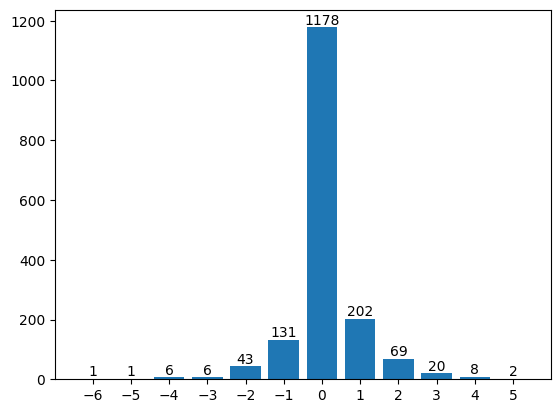

In [10]:
import matplotlib.pyplot as plt

labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
# Menambahkan label pada setiap batang
for i in range(len(labels)):
    plt.text(labels[i], counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()

sebelum masuk ke modelling, kita harus merubah kata positif, negatif, dan netral menjadi 1, -1, 0. karna machine learning nanti akan ada proses transformasi data dan itu menggunakan angka saja.

In [11]:
# Membuat kamus penggantian nilai
mapping = {'positif': 1, 'netral': 0, 'negatif': -1}

# Mengganti nilai dalam kolom sentiment menggunakan kamus penggantian
df['sentiment'] = df['sentiment'].map(mapping)

df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,0
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,1
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,0
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,0
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,0
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,0
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,0
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,0
1665,1665,Uniqlo,uniqlo,0


In [12]:
# kita akan menghitung jumlah tweet positif, negatif, netral. 
# hasil ini akan kita bandingan nanti setelah menggunakan machinee learning
def count_sentiment():
    # Menghitung jumlah record dengan nilai positif
    count_positif = df[df['sentiment'] == 1]['sentiment'].count()

    # Menghitung jumlah record dengan nilai netral
    count_netral = df[df['sentiment'] == 0]['sentiment'].count()

    # Menghitung jumlah record dengan nilai negatif
    count_negatif = df[df['sentiment'] == -1]['sentiment'].count()

    print("Jumlah record dengan nilai positif:", count_positif)
    print("Jumlah record dengan nilai netral:", count_netral)
    print("Jumlah record dengan nilai negatif:", count_negatif)
count_sentiment()

Jumlah record dengan nilai positif: 301
Jumlah record dengan nilai netral: 1178
Jumlah record dengan nilai negatif: 188


# Modelling

kita harus mengimport beberapa modul terlebih dahulu. kita akan menggunakan algoritma naive bayes. sebenernya ada banyak algoritma yang bisa dipakai, seperti naive bayes, support vector machine atau svm, apriori, k-means, dll. kenapa pakai naive bayes, karena algoritma ini hanya membutuhkan jumlah data pelatihan yang kecil untuk menentukan estimasi parameter yang diperlukan dalam proses ini.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
'''
Seperti yang kita tahu untuk dapat menggunakan sebuah model machine learning 
maka kita membutuhkan data dengan tipe numerik atau integer, akan tetapi salah satu satu feature yang kita miliki 
merupakan data teks. Nah pada kesempatan ini kita akan memanfaatkan metode perubahan data teks - matriks 
yang sudah kita pelajari sebelumnya, yaitu TF-IDF
'''
#Mari kita mulai, kita akan memanfaatkan metode TfidVectorizer pada library sklearn dan gaussian Naive Bayes.
vectorizer = TfidfVectorizer (max_features=2500)

model_g = GaussianNB()

In [15]:
#Lalu kita ubah data text_clean kita ke dalam bentuk TFIDF Vectorizer
v_data = vectorizer.fit_transform(df['clean_tweet']).toarray()

vectorizer.fit_transform(df['clean_tweet'])

<1667x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 13100 stored elements in Compressed Sparse Row format>

In [16]:
#Setelah ini mari kita lakukan pembagian data menjadi data train dan testing lalu fit kedalam model kita.

X_train, X_test, y_train, y_test = train_test_split(v_data, df['sentiment'], test_size=0.2, random_state=50)
model_g.fit(X_train,y_train)

GaussianNB()

In [17]:
#Dan kita lakukan penghitungan confussion matrix, classification report, dan accuracy score

y_preds = model_g.predict(X_test)

print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[15 19  8]
 [89 99 43]
 [ 6 29 26]]
              precision    recall  f1-score   support

          -1       0.14      0.36      0.20        42
           0       0.67      0.43      0.52       231
           1       0.34      0.43      0.38        61

    accuracy                           0.42       334
   macro avg       0.38      0.40      0.37       334
weighted avg       0.54      0.42      0.46       334

nilai akurasinya adalah  0.41916167664670656


Nilai Akurasi, Precision, Recall, F1-Score menunjukkan model kita merupakan model yang cukup baik untuk kasus ini. Support yang  terlalu jauh juga menandakan bahwa pembagian dataset kita cukup buruk. Jika support kita berbeda jauh bisa dicoba mengubah nilai random_state agar pembagian label 1, -1, dan 0 lebih seimbang.

In [18]:
df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,0
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,1
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,0
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,0
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,0
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,0
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,0
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,0
1665,1665,Uniqlo,uniqlo,0


In [19]:
#Sekarang mari kita gunakan untuk melakukan klasifikasi pada data tweet

v_data = vectorizer.transform(df["clean_tweet"]).toarray()
y_classification = model_g.predict(v_data)

df["sentiment"] = list(y_classification)

df

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,GA 2 tumbler kece by Uniqlo new untuk 2 orang ...,tumbler kece by uniqlo new orang silakan reply...,0
1,1,Udah gajian tetep ga sanggup belanja di uniqlo,udah gajian tetep sanggup belanja uniqlo,1
2,2,Sering padahal begini Uniqlo pernah dapet UT g...,uniqlo dapet ut graphic harga doang,-1
3,3,MASIH ADA GA KLU ADA BESOK GW SAMPERIN UNIQLO ...,klu besok gw samperin uniqlo deket rumah,-1
4,4,Wiiii uniqlo lagi diskon yuk,wiiii uniqlo diskon yuk,0
...,...,...,...,...
1662,1662,Jaman SMA pengen ke mall Kuningan apa tu jauh ...,jaman sma pengen mall kuningan tu pengen liat ...,0
1663,1663,Saya sih pengguna Uniqlo H amp M dan Levi s se...,sih pengguna uniqlo h amp m levi s sejati hasi...,0
1664,1664,Uniqlo kapan diskon lg si,uniqlo diskon lg si,-1
1665,1665,Uniqlo,uniqlo,-1


In [20]:
# tampilkan jumlah tweet positif, negatif, netral. lihat perbedaannya
count_sentiment()

Jumlah record dengan nilai positif: 436
Jumlah record dengan nilai netral: 728
Jumlah record dengan nilai negatif: 503


# Insight

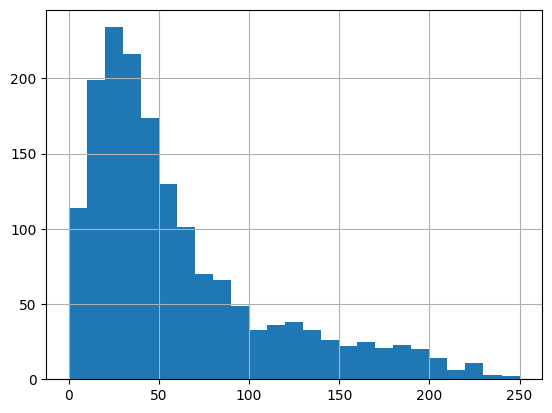

In [21]:
#jumlah karakter pada tweet
bin_range = np.arange(0, 260, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)
plt.show()

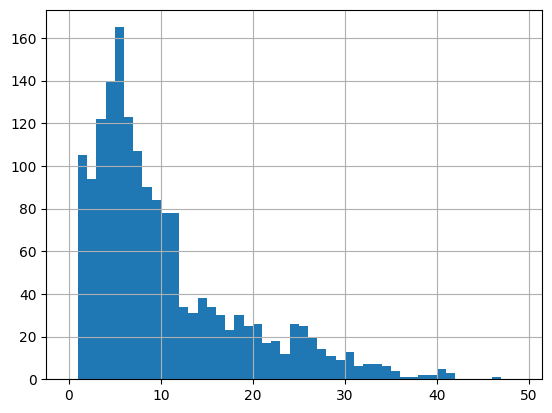

In [22]:
#jumlah kata dalam tweet
bin_range = np.arange(0, 50)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

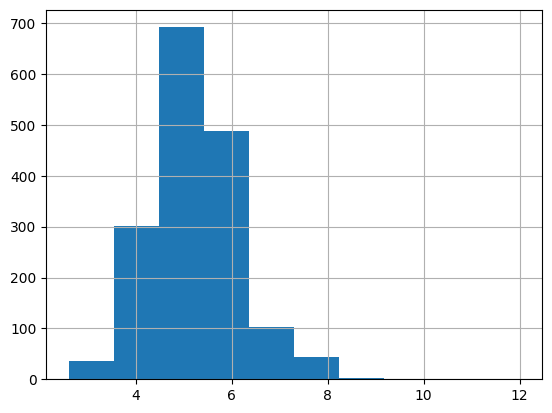

In [23]:
#Panjang Kata Rata-Rata Pada tweet
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [24]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df['clean_tweet'] for word in tweet]

In [25]:
# untuk menampilkan kata yang banyak keluar didalam tweet, kita menggunakan fungsi freqdist dalam modul ntlk
from nltk.probability import FreqDist
fqdist = FreqDist(tweets)

most_common_word = fqdist.most_common(20)

print(most_common_word)

[('uniqlo', 1782), ('banget', 225), ('beli', 213), ('iya', 164), ('baju', 128), ('amp', 85), ('kaos', 84), ('harga', 79), ('pake', 71), ('tp', 70), ('sih', 70), ('nya', 67), ('store', 66), ('udah', 65), ('m', 65), ('indonesia', 64), ('kak', 59), ('diskon', 58), ('celana', 58), ('kemeja', 56)]


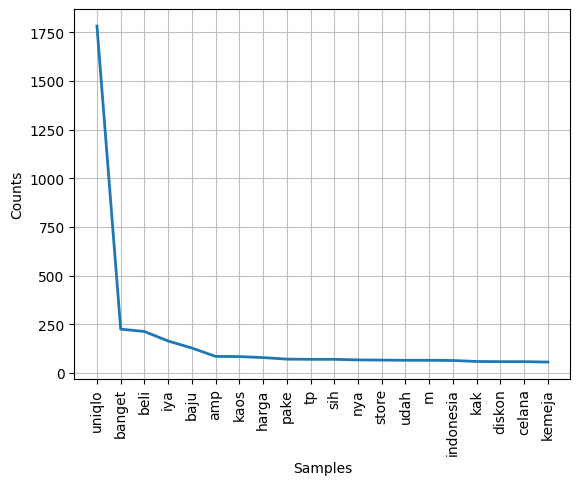

In [26]:
# lalu di buat visualisasinya agar mudah dilihat
fqdist.plot(20,cumulative=False)

plt.show()

In [27]:
# biagram analysis
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print (result)

(uniqlo, uniqlo)                     70
(beli, uniqlo)                       42
(amp, m)                             41
(h, amp)                             41
(baju, uniqlo)                       38
(uniqlo, indonesia)                  36
(uniqlo, airism)                     29
(grup, uniqlo)                       27
(uniqloindonesia, uniqlolifewear)    25
(uniqlo, x)                          24
(open, jastip)                       23
(banget, banget)                     22
(neighborhood, store)                21
(jastip, uniqlo)                     21
(kaos, uniqlo)                       21
(banget, uniqlo)                     21
(uniqlo, beli)                       19
(kemeja, uniqlo)                     18
(uniqlo, diskon)                     18
(uniqlo, iya)                        18
Name: count, dtype: int64


In [28]:
df['clean_tweet'] = df['clean_tweet'].str.join(' ')

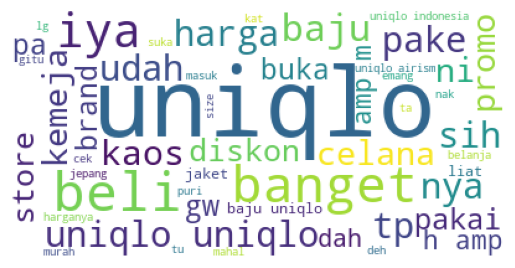

In [29]:
# untuk visualisasi yang terakhir menggunakan wordcloud untuk melihat kata apa saja yang banyak muncul didalam tweet
from wordcloud import WordCloud
# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in df['clean_tweet']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()